<h1>Homework 1</h1>
<h3> K - Nearest Neighbors section </h3>
<p> This section comprehends point from 1 to 7 </p>

Automatically created module for IPython interactive environment


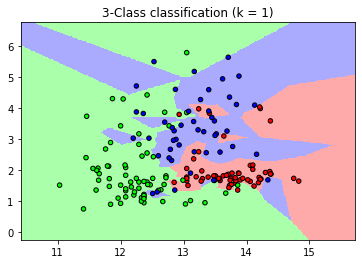

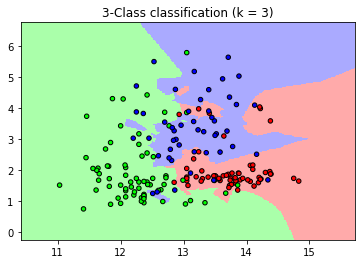

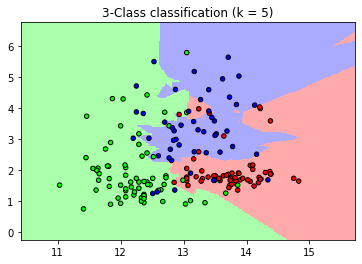

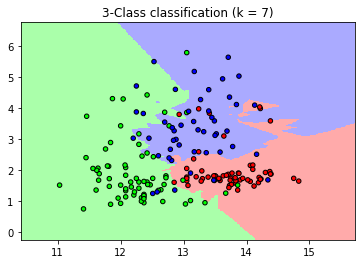

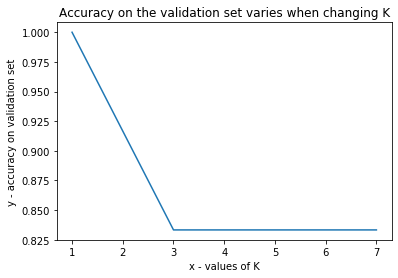

Use the best value of K and evaluate the model on the test set. How well does it works?
Accuracy with K =  1 evaluated on the test set: 0.833


In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, model_selection, metrics

#load wine dataset
wine = datasets.load_wine()

#we choose only the first two attributes
X = wine.data[:, :2]
y = wine.target

# divide to get the right percentage of train data
X_t, X_test, y_t, y_test = model_selection.train_test_split(X, y, random_state=np.random.randint(0,100), test_size=0.3)

# divide training total into validation and training
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_t, y_t, random_state=np.random.randint(0,100), test_size=0.14)

# step size in the mesh - to check what this means
h = .02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# array of variuos Ks to try KNN with
ks = [1,3,5,7]

#accurancy array, needed later to plot accurancy of various clf on validation set
acc_arr = []

# for which iterates every K and plots the relative data & decision boundaries 
for k in ks:
    n_neighbors = k;
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    # train the classifier on the training set
    clf.fit(X_t, y_t)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_t[:, 0].min() - 1, X_t[:, 0].max() + 1
    y_min, y_max = X_t[:, 1].min() - 1, X_t[:, 1].max() + 1
    
    #the arange method return evenly spaced data
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # test the classifier on the test set
    # ravel method returns a contigous flattened array
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"
              % (n_neighbors))
    #append accuracy score on validation set to list
    acc_arr.append(metrics.accuracy_score(y_valid, clf.fit(X_t, y_t).predict(X_valid)))
plt.show()

#setting up graph for accuracy on validation set
x = ks
y = acc_arr
plt.plot(x,y)
plt.xlabel("x - values of K")
plt.ylabel("y - accuracy on validation set")
plt.title("Accuracy on the validation set varies when changing K")
plt.show()

#choose the best value of K from the score on the validation set
k_best_index = acc_arr.index(max(acc_arr))
k_best = ks[k_best_index]

print("Use the best value of K and evaluate the model on the test set. How well does it works?")
print("Accuracy with K = ", k_best, "evaluated on the test set: %.3f" %(metrics.accuracy_score(y_test, clf.fit(X_train, y_train).predict(X_test))))

<h3> Linear SVM section </h3>
<p> Which contains points from 8 to 11 </p>

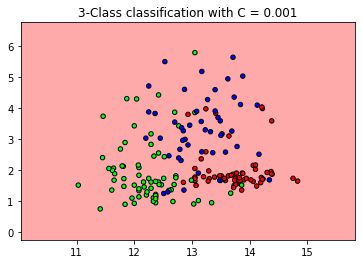

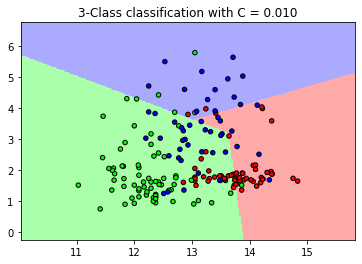

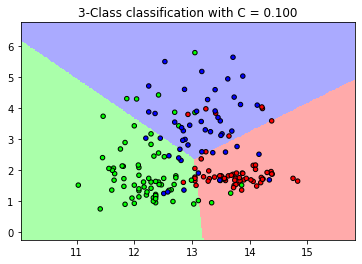

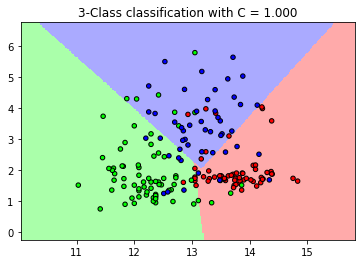

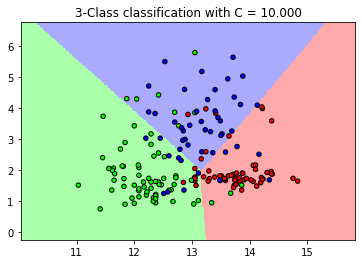

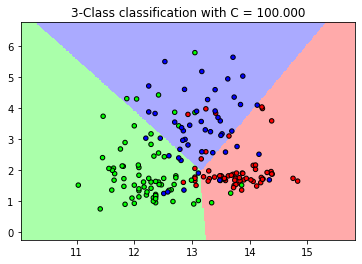

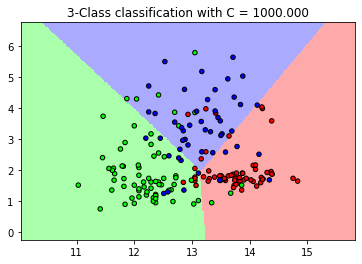

Use the best value of C and evaluate the model on the test set. How well does it works?
Accuracy with C =  1 evaluated on the test set: 0.796


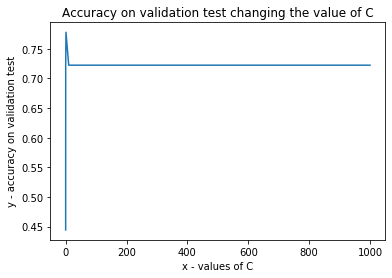

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets, model_selection, svm, preprocessing, metrics 

#lod wine dataset
wine = datasets.load_wine()

#we choose only the first two attributes
X = wine.data[:, :2]
y = wine.target

# divide to get the right percentage of train data
X_t, X_test, y_t, y_test = model_selection.train_test_split(X, y, random_state=np.random.randint(0,100), test_size=0.3)

# divide training total into validation and training
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_t, y_t, random_state=np.random.randint(0,100), test_size=0.14)

#various C values
C_val = [0.001, 0.01, 0.1, 1, 10, 100, 1000]


# step size in the mesh - to check what this means
h = .02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#accurancy array, needed later to plot accurancy of various clf on validation set
acc_arr = []

# for which iterates every K and plots the relative data & decision boundaries 
for c in C_val:
    # we create an instance of Linear SVC and fit the data.
    clf = svm.SVC(kernel='linear', C=c)
    # train the classifier on the training set
    clf.fit(X_t, y_t)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_t[:, 0].min() - 1, X_t[:, 0].max() + 1
    y_min, y_max = X_t[:, 1].min() - 1, X_t[:, 1].max() + 1
    
    #the arange method return evenly spaced data
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # test the classifier on the test set
    # ravel method returns a contigous flattened array
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification with C = %.3f" %( c))
    
    #append accuracy score on validation set to list
    acc_arr.append(metrics.accuracy_score(y_valid, clf.fit(X_t, y_t).predict(X_valid)))
plt.show()

#plot the accuracy on the validation set
x = C_val
y = acc_arr
plt.plot(x,y)
plt.xlabel("x - values of C")
plt.ylabel("y - accuracy on validation test")
plt.title("Accuracy on validation test changing the value of C")
plt.show

# choose the best C value based on the validation set
C_best_index = acc_arr.index(max(acc_arr))
C_best = C_val[C_best_index]

#Output
print("Use the best value of C and evaluate the model on the test set. How well does it works?")
print("Accuracy with C = ", C_best, "evaluated on the test set: %.3f" %(metrics.accuracy_score(y_test, clf.fit(X_t, y_t).predict(X_test))))

<h3>10. How the boundaries change? Why?</h3>
<p> TODO - insert answer here </p>

<h3>SVC with RBF kernel</h3>
<p>Section with points from 12 to 15</p>

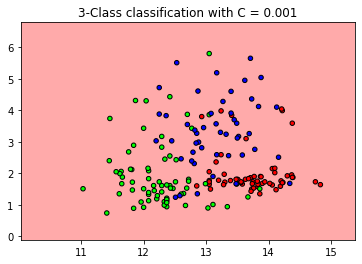

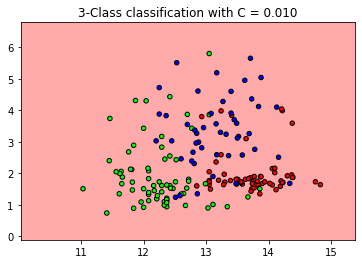

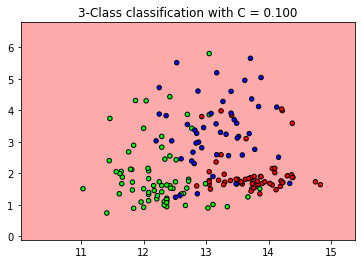

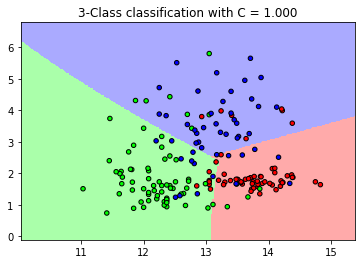

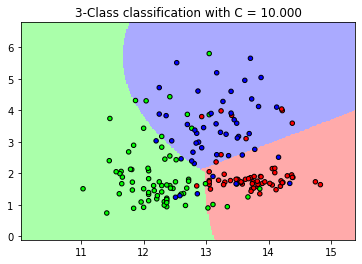

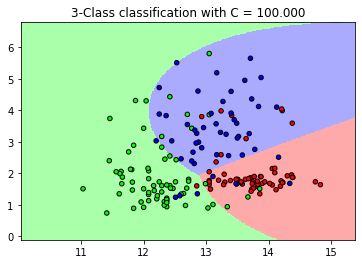

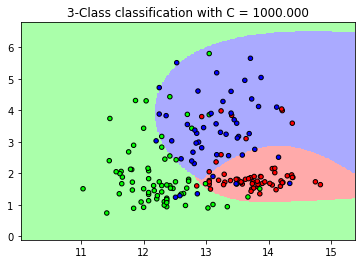

We have the best score on the test set with the value of C =  1000


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets, model_selection, svm, preprocessing, metrics 

#lod wine dataset
wine = datasets.load_wine()

#we choose only the first two attributes
X = wine.data[:, :2]
y = wine.target

# divide to get the right percentage of train data
X_t, X_test, y_t, y_test = model_selection.train_test_split(X, y, random_state=np.random.randint(0,100), test_size=0.3)

# divide training total into validation and training
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_t, y_t, random_state=np.random.randint(0,100), test_size=0.14)

#various C values
C_val = [0.001, 0.01, 0.1, 1, 10, 100, 1000]


# step size in the mesh - to check what this means
h = .02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#accurancy array, needed later to plot accurancy of various clf on validation set
acc_arr = []

# for which iterates every K and plots the relative data & decision boundaries 
for c in C_val:
    # we create an instance of Linear SVC and fit the data.
    clf = svm.SVC(kernel='rbf', C=c, gamma='scale')
    # train the classifier on the training set
    clf.fit(X_t, y_t)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_t[:, 0].min() - 1, X_t[:, 0].max() + 1
    y_min, y_max = X_t[:, 1].min() - 1, X_t[:, 1].max() + 1
    
    #the arange method return evenly spaced data
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # test the classifier on the test set
    # ravel method returns a contigous flattened array
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification with C = %.3f" %( c))
    
    #append accuracy score on validation set to list
    acc_arr.append(metrics.accuracy_score(y_test, clf.fit(X_t, y_t).predict(X_test)))
plt.show()

# choose the best C value based on the test set

C_best_index = acc_arr.index(max(acc_arr))
C_best = C_val[C_best_index]

print("We have the best score on the test set with the value of C = ", C_best)